<a href="https://colab.research.google.com/github/francescobianca/Covid-19-Italy-DataAnalysis/blob/master/Covid_19_DataAnalysis_Italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dati italiani sul **Covid-19** forniti dalla protezione civile
Per info: [Git_Repo](https://github.com/pcm-dpc/COVID-19)


In [0]:
!git clone https://github.com/pcm-dpc/COVID-19


Cloning into 'COVID-19'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1348 (delta 0), reused 1 (delta 0), pack-reused 1343
Receiving objects: 100% (1348/1348), 35.11 MiB | 9.64 MiB/s, done.
Resolving deltas: 100% (962/962), done.


In [0]:
# Importo dipendenze
import os
import re
import time    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [0]:
dati_province_path = '/content/COVID-19/dati-province/'
dati_regioni_path = '/content/COVID-19/dati-regioni/'
dati_andamento_nazionale_path = '/content/COVID-19/dati-andamento-nazionale/'

dati_province = os.listdir(dati_province_path)
dati_regioni = os.listdir(dati_regioni_path)
dati_andamento_nazionale = os.listdir(dati_andamento_nazionale_path)

In [0]:
# Inserisco in una lista i file che contengono i dati giornalieri nazionali
dati_giornalieri = []
pattern = 'dpc-covid19-ita-andamento-nazionale-\d+' # Regex con cui vado ad eliminare i csv non necessari 
for x in sorted(dati_andamento_nazionale): # Ordino la lista così da avere anche ordine cronologico
  if re.match(pattern, x):
    dati_giornalieri.append(x)

# Inserisco in una lista i file che contengono i dati giornalieri regionali
dati_giornalieri_regioni = []
pattern = 'dpc-covid19-ita-regioni-\d+' # Regex con cui vado ad eliminare i csv non necessari 
for x in sorted(dati_regioni): # Ordino la lista così da avere anche ordine cronologico
  if re.match(pattern, x):
    dati_giornalieri_regioni.append(x)

# Inserisco in una lista i file che contengono i dati giornalieri provinciali
dati_giornalieri_province = []
pattern = 'dpc-covid19-ita-province-\d+' # Regex con cui vado ad eliminare i csv non necessari 
for x in sorted(dati_province): # Ordino la lista così da avere anche ordine cronologico
  if re.match(pattern, x):
    dati_giornalieri_province.append(x)

## Definizione di alcuni metodi utili per lavorare con i dati della repository


In [0]:
#@title Seleziona la data:
giornata_da_monitorare = '2020-03-30' #@param {type:"date"}
giornata_da_monitorare = giornata_da_monitorare.replace('-', '') # Rimuovo i trattini dalla data

print(giornata_da_monitorare)

20200330


In [0]:
#@title Seleziona il dato di tuo interesse:

parametro_da_monitorare_italia = 'totale_ospedalizzati' #@param ["totale_casi", "ricoverati_con_sintomi", "terapia_intensiva", "totale_ospedalizzati", "isolamento_domiciliare", "variazione_totale_positivi","totale_positivi", "nuovi_positivi", "dimessi_guariti", "deceduti", "tamponi"]

print(parametro_da_monitorare_italia)

totale_ospedalizzati


In [0]:
def recupera_statistiche_italia(giornata_da_monitorare, parametro_da_monitorare_italia):
  """Funzione che consente di fare il parsing del csv

  Parameters:
  giornata_da_monitorare: Giornata che si vuole monitorare
  parametro_da_monitorare_italia: Il parametro di proprio interesse che si vuole recupare

  Returns:
  int: ritorna il valore del parametro_da_monitorare_italia per la determinata giornata_da_monitorare

  """
  file_da_monitorare = ""
  for giornata in dati_giornalieri:
    if giornata_da_monitorare in giornata:
      file_da_monitorare = giornata
      break
  
  if (file_da_monitorare == ""):
    raise Exception("Non è presente un file per questa giornata")
  else:
    df = pd.read_csv(dati_andamento_nazionale_path+file_da_monitorare)
    if parametro_da_monitorare_italia == "totale_casi":
      return df['totale_casi'].values[0]
    elif parametro_da_monitorare_italia == "ricoverati_con_sintomi":
      return df['ricoverati_con_sintomi'].values[0]
    elif parametro_da_monitorare_italia == "terapia_intensiva":
      return df['terapia_intensiva'].values[0]
    elif parametro_da_monitorare_italia == "totale_ospedalizzati":
      return df['totale_ospedalizzati'].values[0]
    elif parametro_da_monitorare_italia == "isolamento_domiciliare":
      return df['isolamento_domiciliare'].values[0]   
    elif parametro_da_monitorare_italia == "totale_attualmente_positivi":
      return df['totale_attualmente_positivi'].values[0]   
    elif parametro_da_monitorare_italia == "nuovi_attualmente_positivi":
      return df['nuovi_attualmente_positivi'].values[0]
    elif parametro_da_monitorare_italia == "dimessi_guariti":
      return df['dimessi_guariti'].values[0]   
    elif parametro_da_monitorare_italia == "deceduti":
      return df['deceduti'].values[0]     
    elif parametro_da_monitorare_italia == "tamponi":
      return df['tamponi'].values[0]

risultato = recupera_statistiche_italia(giornata_da_monitorare, parametro_da_monitorare_italia)
print("Per la giornata: "+ giornata_da_monitorare + " il valore del parametro: " + parametro_da_monitorare_italia + " è: "+ str(risultato))

Per la giornata: 20200330 il valore del parametro: totale_ospedalizzati è: 31776


In [0]:
#@title Seleziona la regione da monitorare:

regione_da_monitorare = 'Calabria' #@param ["Calabria", "Abruzzo", "Basilicata", "P.A. Bolzano", "Campania", "Emilia Romagna", "Friuli Venezia Giulia", "Lazio", "Liguria", "Lombardia", "Marche", "Molise", "Piemonte", "Puglia", "Sardegna", "Sicilia", "Toscana", "P.A. Trento", "Umbria", "Valle d'Aosta", "Veneto"]

print(regione_da_monitorare)

Calabria


In [0]:
#@title Seleziona il dato di tuo interesse (regione):

parametro_da_monitorare_regione = 'nuovi_positivi' #@param ["totale_casi", "ricoverati_con_sintomi", "terapia_intensiva", "totale_ospedalizzati", "isolamento_domiciliare","totale_positivi", "variazione_totale_positivi", "nuovi_positivi", "dimessi_guariti", "deceduti", "tamponi"]

print(parametro_da_monitorare_regione)

nuovi_positivi


In [0]:
def recupera_statistiche_regione(giornata_da_monitorare, parametro_da_monitorare_regione, regione_da_monitorare):
  """Funzione che consente di fare il parsing del csv per regione

  Parameters:
  giornata_da_monitorare: Giornata che si vuole monitorare
  parametro_da_monitorare_regione: Il parametro di proprio interesse che si vuole recuperare
  regione_da_monitorare: La regione che si vuole considerare

  Returns:
  int: ritorna il valore del parametro_da_monitorare_regione per la determinata giornata_da_monitorare nella regione_da_monitorare

  """
  file_da_monitorare = ""
  for giornata in dati_giornalieri_regioni:
    if giornata_da_monitorare in giornata:
      file_da_monitorare = giornata
      break

  if (file_da_monitorare == ""):
    raise Exception("Non è presente un file per questa giornata")
  else:
    df = pd.read_csv(dati_regioni_path+file_da_monitorare)
    is_region =  df['denominazione_regione'] == regione_da_monitorare
    df_regione = df[is_region]

    if parametro_da_monitorare_regione == "totale_casi":
      return df_regione['totale_casi'].values[0]
    elif parametro_da_monitorare_regione == "ricoverati_con_sintomi":
      return df_regione['ricoverati_con_sintomi'].values[0]
    elif parametro_da_monitorare_regione == "terapia_intensiva":
      return df_regione['terapia_intensiva'].values[0]
    elif parametro_da_monitorare_regione == "totale_ospedalizzati":
      return df_regione['totale_ospedalizzati'].values[0]
    elif parametro_da_monitorare_regione == "isolamento_domiciliare":
      return df_regione['isolamento_domiciliare'].values[0]   
    elif parametro_da_monitorare_regione == "totale_attualmente_positivi":
      return df_regione['totale_attualmente_positivi'].values[0]   
    elif parametro_da_monitorare_regione == "nuovi_attualmente_positivi":
      return df_regione['nuovi_attualmente_positivi'].values[0]
    elif parametro_da_monitorare_regione == "dimessi_guariti":
      return df_regione['dimessi_guariti'].values[0]   
    elif parametro_da_monitorare_regione == "deceduti":
      return df_regione['deceduti'].values[0]     
    elif parametro_da_monitorare_regione == "tamponi":
      return df_regione['tamponi'].values[0]

risultato_regione = recupera_statistiche_regione(giornata_da_monitorare, parametro_da_monitorare_regione, regione_da_monitorare)
print("Per la giornata: "+ giornata_da_monitorare + " il valore del parametro: " + parametro_da_monitorare_regione + " per la regione: " + regione_da_monitorare +" è: "+ str(risultato_regione))

Per la giornata: 20200330 il valore del parametro: nuovi_positivi per la regione: Calabria è: None


In [0]:
def recupera_regione_province(giornata_da_monitorare, regione_da_monitorare):
  """Funzione che data una regione mi restituisce i dati di tutte le sue province

  Parameters:
  giornata_da_monitorare: Giornata che si vuole monitorare
  regione_da_monitorare: La regione che si vuole considerare

  Returns:
  provincia_totali: dizionario composto da chiave: provincia e valore: numero di casi totali in quella provincia.

  """  
  file_da_monitorare = ""
  for giornata in dati_giornalieri_province:
    if giornata_da_monitorare in giornata:
      file_da_monitorare = giornata
      break

  if (file_da_monitorare == ""):
    raise Exception("Non è presente un file per questa giornata")
  else:
    df = pd.read_csv(dati_province_path+file_da_monitorare)
    is_regione_provincia =  df['denominazione_regione'] == regione_da_monitorare
    df_regione_provincia = df[is_regione_provincia]

    df_regione_provincia = df_regione_provincia[df.denominazione_provincia != 'In fase di definizione/aggiornamento'] # C'è una riga nel df che non mi interessa
    provincia_totali = {}
    for index, row in df_regione_provincia.iterrows():
      provincia_totali[row['denominazione_provincia']] = row['totale_casi']

    return provincia_totali

dati_regioni_province = recupera_regione_province(giornata_da_monitorare, regione_da_monitorare)
print(dati_regioni_province)

{'Frosinone': 290, 'Latina': 254, 'Rieti': 105, 'Roma': 2068, 'Viterbo': 181}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [0]:
#@title Seleziona la provicia da monitorare:

provincia_da_monitorare = 'Catanzaro' #@param ["Catanzaro", "Cosenza", "Crotone", "Reggio di Calabria", "Vibo Valentia"]

print(provincia_da_monitorare)


Catanzaro


In [0]:
def recupera_casi_provincia(giornata_da_monitorare, provincia_da_monitorare):
  """Funzione che consente di fare il parsing del csv per provincia

  Parameters:
  giornata_da_monitorare: Giornata che si vuole monitorare
  provincia_da_monitorare: La provincia che si vuole considerare

  Returns:
  int: ritorna il totale dei casi per la determinata giornata_da_monitorare nella provincia_da_monitorare

  """
  file_da_monitorare = ""
  for giornata in dati_giornalieri_province:
    if giornata_da_monitorare in giornata:
      file_da_monitorare = giornata
      break

  if (file_da_monitorare == ""):
    raise Exception("Non è presente un file per questa giornata")
  else:
    df = pd.read_csv(dati_province_path+file_da_monitorare)
    is_provincia =  df['denominazione_provincia'] == provincia_da_monitorare
    df_provincia = df[is_provincia]
    
    return df_provincia['totale_casi'].values[0]
  

risultato_provincia = recupera_casi_provincia(giornata_da_monitorare, provincia_da_monitorare)
print("Per la giornata: "+ giornata_da_monitorare + " il totale dei casi per la provincia: " + provincia_da_monitorare +" è: "+ str(risultato_provincia))

Per la giornata: 20200330 il totale dei casi per la provincia: Catanzaro è: 134


## Visualizzazione di Plot

### Dati Nazionali

In [0]:
dati_nazionali_latest = pd.read_csv('/content/COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale-latest.csv')
dati_nazionali_latest.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-03-30T17:00:00,ITA,27795,3981,31776,43752,75528,1648,14620,11591,101739,477359,NaN,NaN


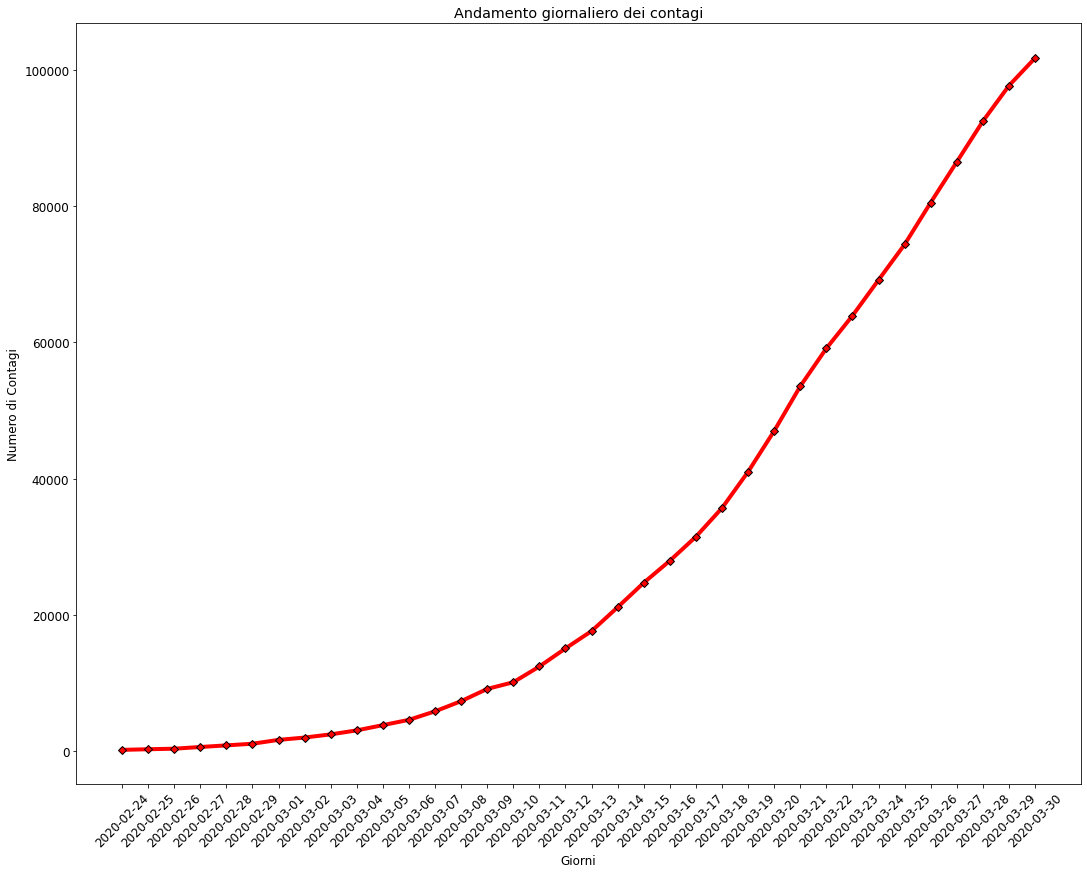

In [12]:
#@title *Andamento giornaliero dei contagi* 👀 Double click on this line to see code of plot { display-mode: "form" }

date_total = {}

for day in dati_giornalieri:
  df_day = pd.read_csv(dati_andamento_nazionale_path+str(day))
  # Ho il dataframe per ogni giorno: Inizio con un semplice plot data totale casi
  data = df_day['data'].values[0]

  f = "%Y-%m-%dT%H:%M:%S"
  conv=time.strptime(str(data),f)
  data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data

  totale_contagi = df_day['totale_casi'].values[0]
  #print(data_convertita+" : "+str(totale_contagi))
  date_total[data_convertita] = totale_contagi

font = {'family' : 'normal',
        'size'   : 12}
    
plt.rc('font', **font)

x = list(date_total.keys())
y = list(date_total.values())

plt.figure(figsize=(18,14))
plt.xticks(rotation=45)
plt.xlabel('Giorni')
plt.ylabel('Numero di Contagi')
plt.title('Andamento giornaliero dei contagi')
plt.plot(x, y,color="red", marker='D', markeredgecolor='black', linewidth=4)
plt.show()

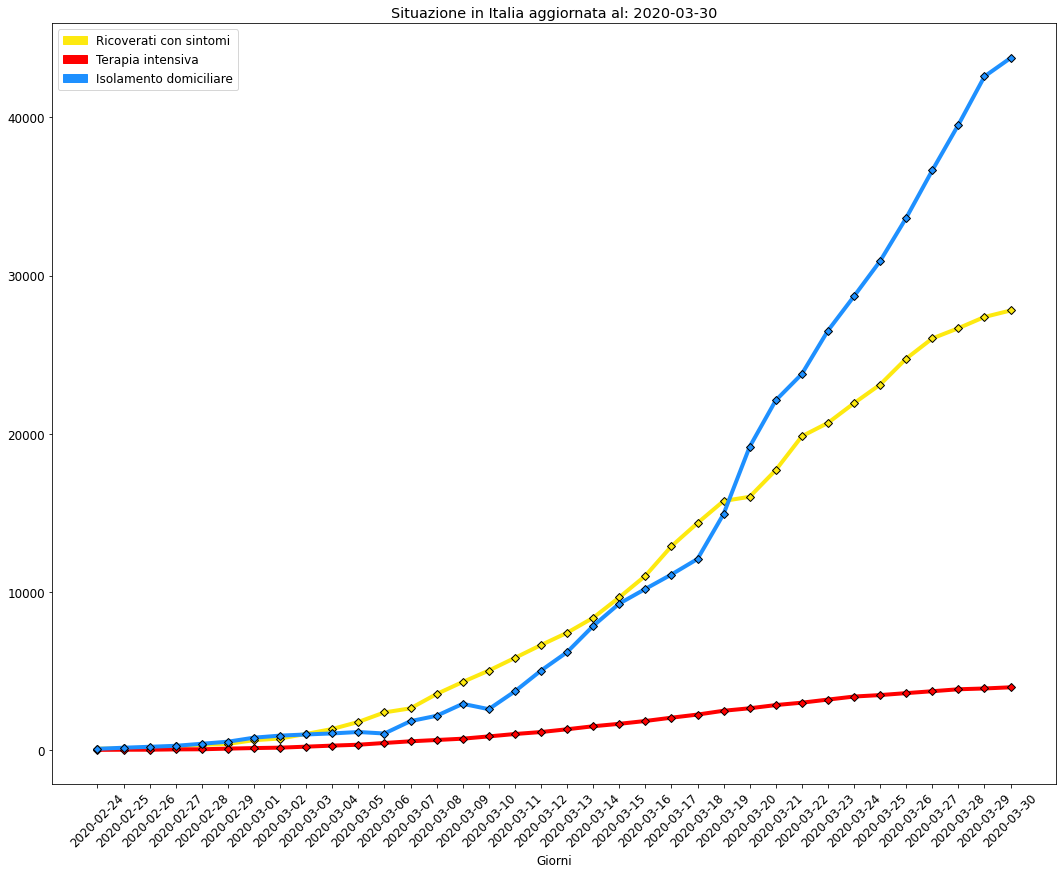

In [11]:
#@title *Andamento giornaliero: statistiche varie* 👀Double click on this line to see code of plot { display-mode: "form" }

# Nuovo plot con ricoverati_con_sintomi,	terapia_intensiva, isolamento_domiciliare
giorno = []
ricoverati_con_sintomi = []
terapia_intensiva = [] 
isolamento_domiciliare = []

for day in dati_giornalieri:
  df_day = pd.read_csv(dati_andamento_nazionale_path+str(day))
  # Ho il dataframe per ogni giorno: Inizio con un semplice plot data totale casi
  data = df_day['data'].values[0]

  f = "%Y-%m-%dT%H:%M:%S"
  conv=time.strptime(str(data),f)
  data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data

  giorno.append(data_convertita) # Giornata considerata
  ricoverati_con_sintomi.append(df_day['ricoverati_con_sintomi'].values[0])
  terapia_intensiva.append(df_day['terapia_intensiva'].values[0])
  isolamento_domiciliare.append(df_day['isolamento_domiciliare'].values[0])

  #totale_contagi = df_day['totale_casi'].values[0]
  #print(data_convertita+" : "+str(totale_contagi))
  #date_total[data_convertita] = totale_contagi

font = {'family' : 'normal',
        'size'   : 12}
    
plt.rc('font', **font)

x = giorno
y1 = ricoverati_con_sintomi
y2 = terapia_intensiva
y3 = isolamento_domiciliare

plt.figure(figsize=(18,14))
plt.xticks(rotation=45)
plt.xlabel('Giorni')
plt.title('Situazione in Italia aggiornata al: '+str(giorno[-1]))
plt.plot(x, y1, color='#fde910', marker='D', markeredgecolor='black', linewidth=4)
plt.plot(x, y2, color='red', marker='D', markeredgecolor='black', linewidth=4)
plt.plot(x, y3, color='#1E90FF', marker='D', markeredgecolor='black', linewidth=4)

red_patch = mpatches.Patch(color='#fde910', label='Ricoverati con sintomi')
yellow_patch = mpatches.Patch(color='red', label='Terapia intensiva')
blue_patch = mpatches.Patch(color='#1E90FF', label='Isolamento domiciliare')
plt.legend(handles=[red_patch, yellow_patch,blue_patch])

plt.show()

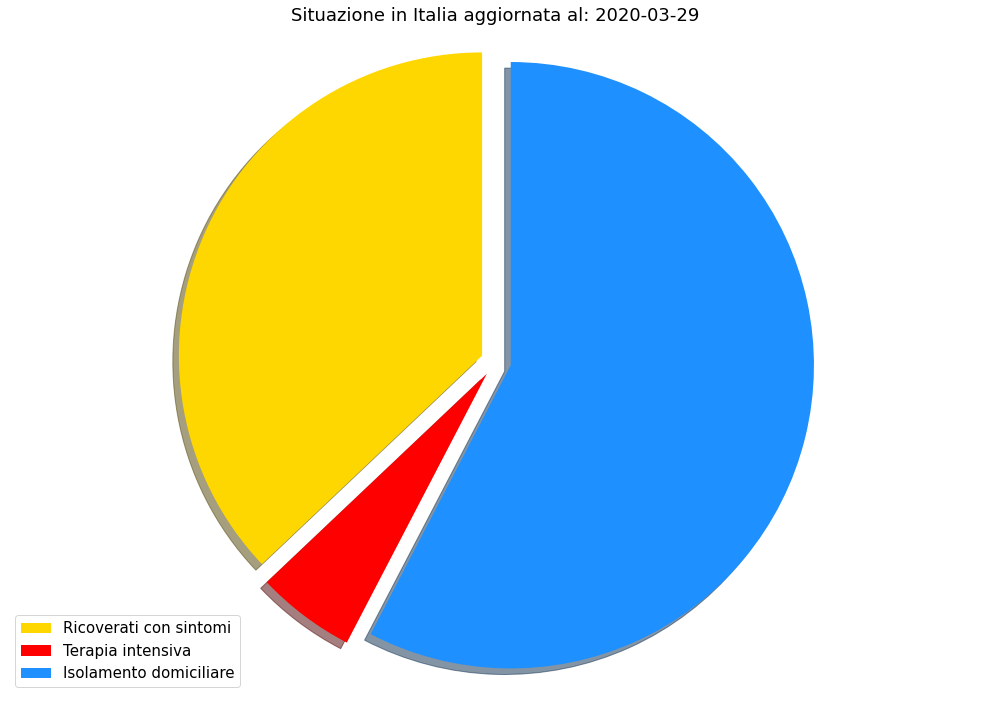

In [0]:
#@title *Andamento giornaliero: statistiche varie con pie chart* 👀 Double click on this line to see code of plot { display-mode: "form" }
# Con -1 prendo i dati dell'ultimo giorno
giorno[-1] 
ricoverati_con_sintomi[-1]
terapia_intensiva[-1] 
isolamento_domiciliare[-1]

tot = ricoverati_con_sintomi[-1]+terapia_intensiva[-1]+isolamento_domiciliare[-1] 

percentuale_ricoverati_con_sintomi = ricoverati_con_sintomi[-1] / tot
percentuale_terapia_intensiva = terapia_intensiva[-1] / tot
percentuale_isolamento_domiciliare = isolamento_domiciliare[-1] / tot

font = {'family' : 'normal',
        'size'   : 15}
    
plt.rc('font', **font)

labels = ['Ricoverati con sintomi', 'Terapia intensiva', 'Isolamento domiciliare']
sizes = [percentuale_ricoverati_con_sintomi, percentuale_terapia_intensiva, percentuale_isolamento_domiciliare]
colors = ['gold', 'red', '#1E90FF']
plt.figure(figsize=(14,10))
explode = list()
for k in labels:
    explode.append(0.05)
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc="best")
plt.title('Situazione in Italia aggiornata al: '+str(giorno[-1]))
plt.axis('equal')
plt.tight_layout()
plt.show()

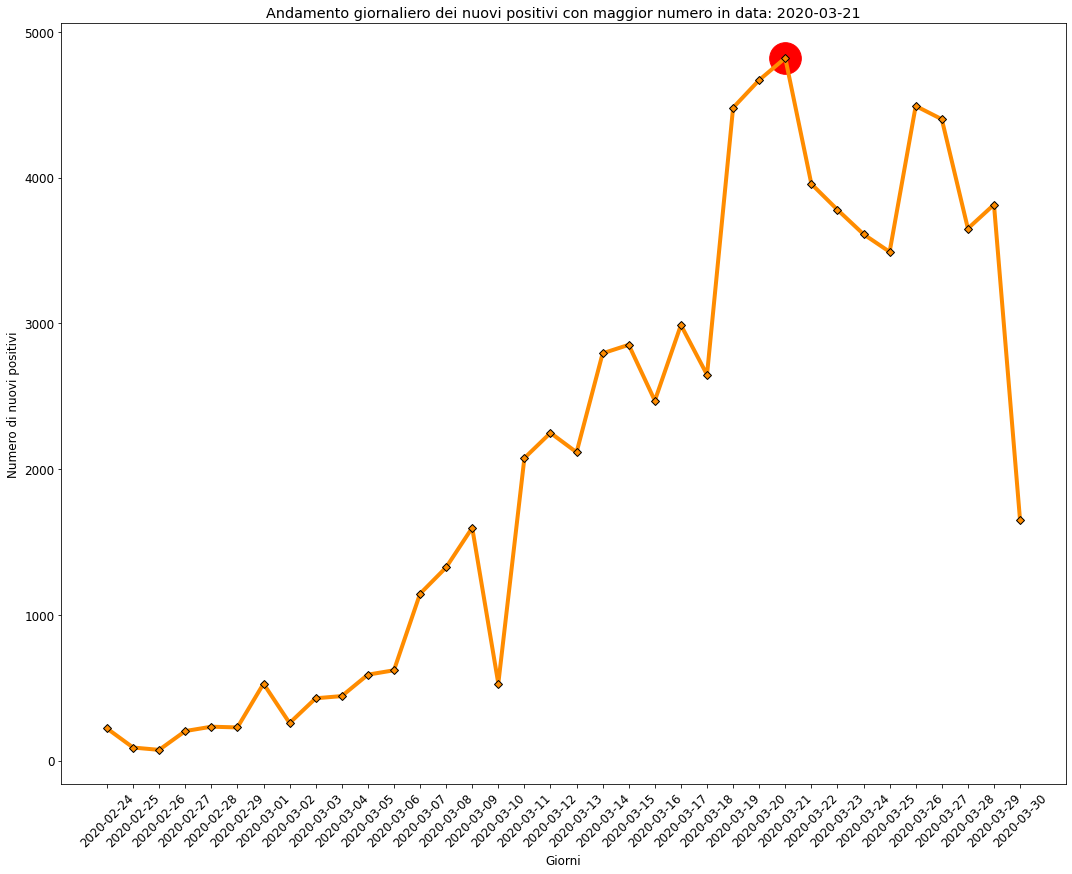

In [31]:
#@title *Nuovi positivi: andamento giornaliero* 👀 Double click on this line to see code of plot { display-mode: "form" }

giorno_nuovi_positivi = {}

for giornata in dati_giornalieri:
  dataframe_giornata = pd.read_csv(dati_andamento_nazionale_path+giornata)
  
  data = dataframe_giornata['data'].values[0]
  f = "%Y-%m-%dT%H:%M:%S"
  conv=time.strptime(str(data),f)
  data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data
  totale_nuovi_positivi = dataframe_giornata['nuovi_attualmente_positivi'].values[0] 
  # Qua è da cambiare con nuovi_positivi per l'aggiornamento della repo

  giorno_nuovi_positivi[data_convertita] = totale_nuovi_positivi

font = {'family' : 'normal',
        'size'   : 12}
    
plt.rc('font', **font)

x = list(giorno_nuovi_positivi.keys())
y = list(giorno_nuovi_positivi.values())

massimo_valore_key = max(giorno_nuovi_positivi, key=giorno_nuovi_positivi.get)
massimo_valore_value = giorno_nuovi_positivi.get(massimo_valore_key)

plt.figure(figsize=(18,14))
plt.xticks(rotation=45)
plt.xlabel('Giorni')
plt.ylabel('Numero di nuovi positivi')
plt.title('Andamento giornaliero dei nuovi positivi con maggior numero in data: '+massimo_valore_key)
plt.plot(x, y,color='#FF8C00', marker='D', markeredgecolor='black', linewidth=4)
plt.scatter(massimo_valore_key, massimo_valore_value, color='r', s=1000)
plt.show()

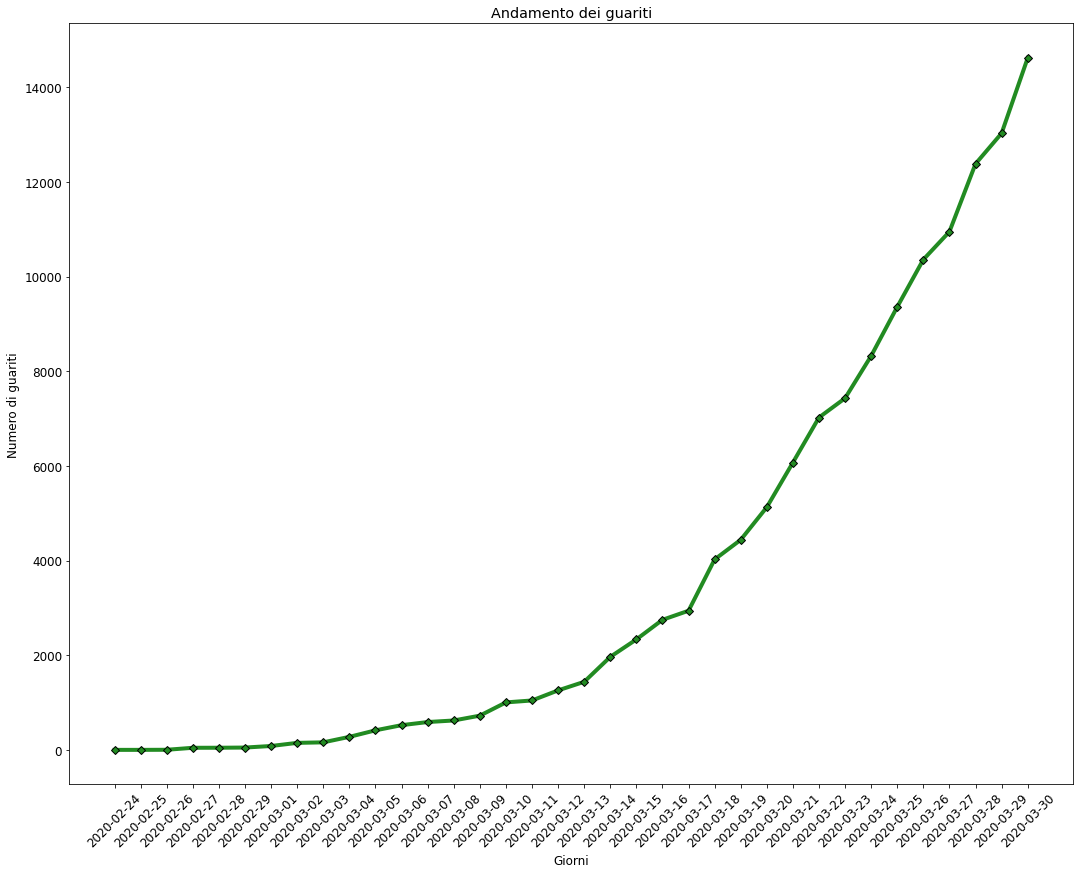

In [34]:
#@title *Guariti: andamento* 👀 Double click on this line to see code of plot { display-mode: "form" }

giorno_guariti = {}

for giornata in dati_giornalieri:
  dataframe_giornata = pd.read_csv(dati_andamento_nazionale_path+giornata)
  
  data = dataframe_giornata['data'].values[0]
  f = "%Y-%m-%dT%H:%M:%S"
  conv=time.strptime(str(data),f)
  data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data
  totale_guariti = dataframe_giornata['dimessi_guariti'].values[0] 
  # Qua è da cambiare con nuovi_positivi per l'aggiornamento della repo

  giorno_guariti[data_convertita] = totale_guariti

font = {'family' : 'normal',
        'size'   : 12}
    
plt.rc('font', **font)

x = list(giorno_guariti.keys())
y = list(giorno_guariti.values())

plt.figure(figsize=(18,14))
plt.xticks(rotation=45)
plt.xlabel('Giorni')
plt.ylabel('Numero di guariti')
plt.title('Andamento dei guariti')
plt.plot(x, y,color='#228B22', marker='D', markeredgecolor='black', linewidth=4)
plt.show()

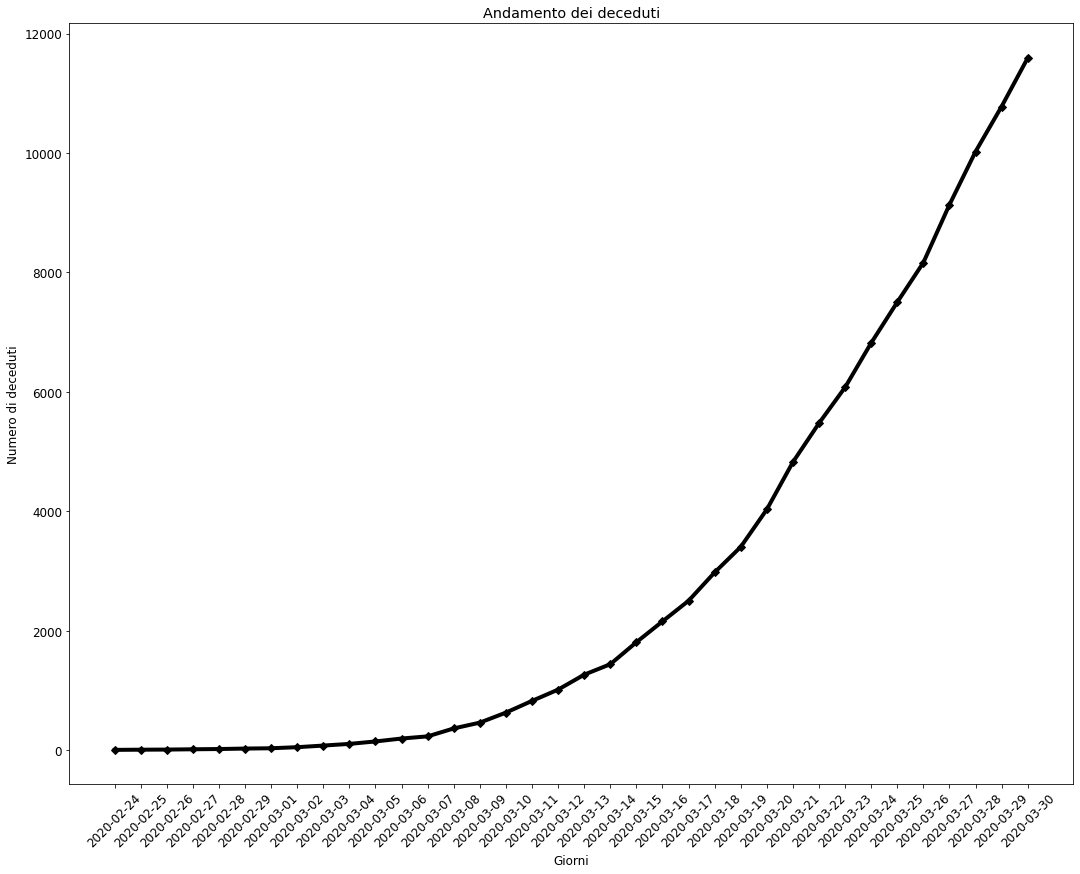

In [36]:
#@title *Deceduti: andamento* 👀 Double click on this line to see code of plot { display-mode: "form" }

giorno_deceduti = {}

for giornata in dati_giornalieri:
  dataframe_giornata = pd.read_csv(dati_andamento_nazionale_path+giornata)
  
  data = dataframe_giornata['data'].values[0]
  f = "%Y-%m-%dT%H:%M:%S"
  conv=time.strptime(str(data),f)
  data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data
  totale_deceduti = dataframe_giornata['deceduti'].values[0] 
  # Qua è da cambiare con nuovi_positivi per l'aggiornamento della repo

  giorno_deceduti[data_convertita] = totale_deceduti

font = {'family' : 'normal',
        'size'   : 12}
    
plt.rc('font', **font)

x = list(giorno_deceduti.keys())
y = list(giorno_deceduti.values())

plt.figure(figsize=(18,14))
plt.xticks(rotation=45)
plt.xlabel('Giorni')
plt.ylabel('Numero di deceduti')
plt.title('Andamento dei deceduti')
plt.plot(x, y,color='#000000', marker='D', markeredgecolor='black', linewidth=4)
plt.show()

### Dati Regionali

In [0]:
# Dataframe contente tutti i dati delle regioni italiane aggiornati agli ultimi disponibili
dati_regioni_latest = pd.read_csv('/content/COVID-19/dati-regioni/dpc-covid19-ita-regioni-latest.csv')
dati_regioni_latest.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-03-29T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,329,68,397,772,1169,142,36,88,1293,7730,NaN,NaN
1,2020-03-29T17:00:00,ITA,17,Basilicata,40.639471,15.805148,32,18,50,147,197,19,1,4,202,1585,NaN,NaN
2,2020-03-29T17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,234,56,290,744,1034,105,116,64,1214,10137,NaN,NaN
3,2020-03-29T17:00:00,ITA,18,Calabria,38.905976,16.594402,124,19,143,434,577,54,12,25,614,8485,NaN,NaN
4,2020-03-29T17:00:00,ITA,15,Campania,40.839566,14.250850,476,135,611,945,1556,149,86,117,1759,11805,NaN,NaN


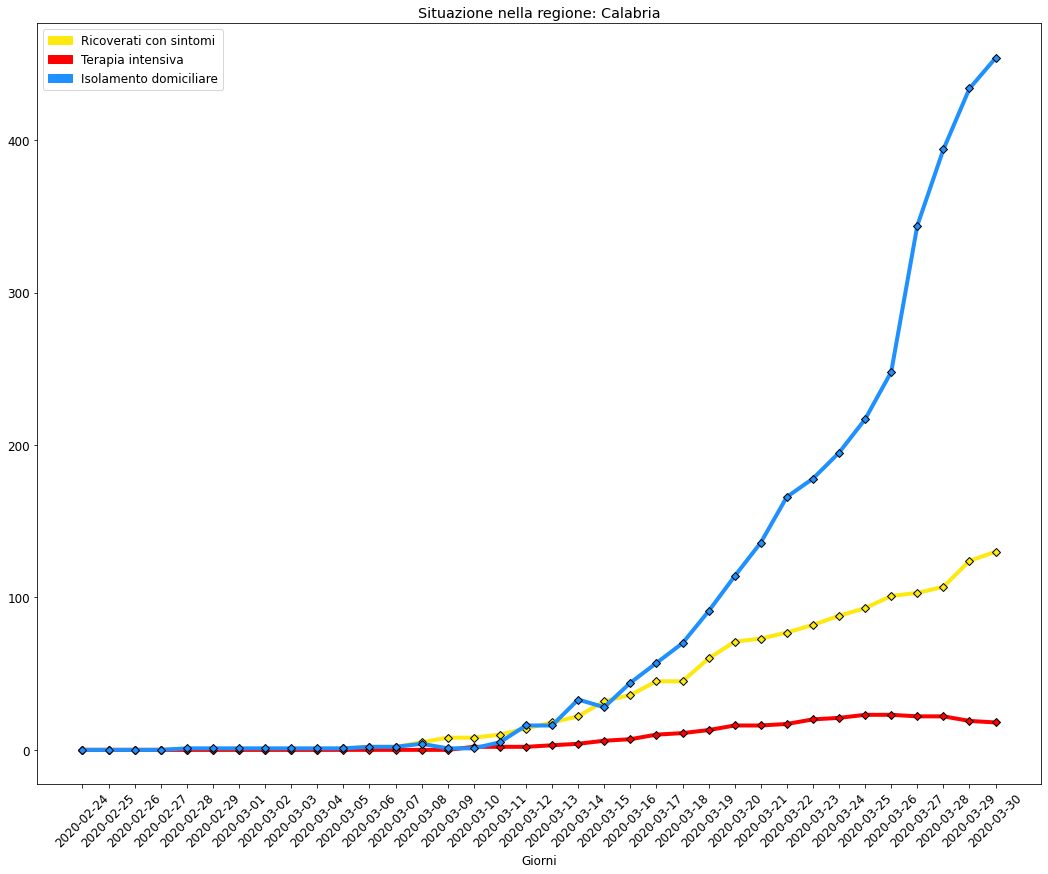

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


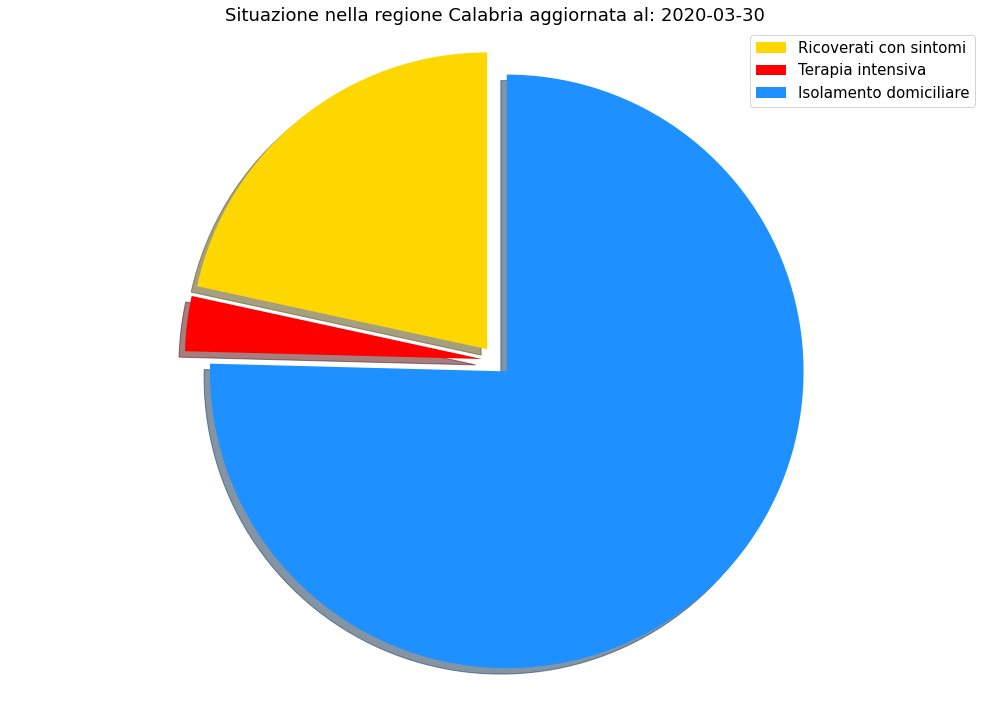

In [13]:
#@title *Andamento giornaliero: statistiche varie regione* 👀 Double click on this line to see code of plot { display-mode: "form" }

def plot_andamento_contagi_regione(regione):

  """
    Funzione che produce un plot dell'andamento dei contagi in una data regione

    Parameters:
    regione (string): regione da monitorare

  """

  giorno_regione = []
  ricoverati_con_sintomi_regione = []
  terapia_intensiva_regione = [] 
  isolamento_domiciliare_regione = []

  for day in dati_giornalieri_regioni:
    df_day_regioni = pd.read_csv(dati_regioni_path+str(day))

    is_region =  df_day_regioni['denominazione_regione'] == regione
    df_region = df_day_regioni[is_region]

    data = df_region['data'].values[0]

    f = "%Y-%m-%dT%H:%M:%S"
    conv=time.strptime(str(data),f)
    data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data

    giorno_regione.append(data_convertita) # Giornata considerata
    ricoverati_con_sintomi_regione.append(df_region['ricoverati_con_sintomi'].values[0])
    terapia_intensiva_regione.append(df_region['terapia_intensiva'].values[0])
    isolamento_domiciliare_regione.append(df_region['isolamento_domiciliare'].values[0])


  font = {'family' : 'normal',
          'size'   : 12}
      
  plt.rc('font', **font)

  x = giorno_regione
  y1 = ricoverati_con_sintomi_regione
  y2 = terapia_intensiva_regione
  y3 = isolamento_domiciliare_regione


  plt.figure(figsize=(18,14))
  plt.xticks(rotation=45)
  plt.xlabel('Giorni')
  plt.title('Situazione nella regione: ' + regione)
  plt.plot(x, y1, color='#fde910', marker='D', markeredgecolor='black', linewidth=4)
  plt.plot(x, y2, color='red', marker='D', markeredgecolor='black', linewidth=4)
  plt.plot(x, y3, color='#1E90FF', marker='D', markeredgecolor='black', linewidth=4)

  red_patch = mpatches.Patch(color='#fde910', label='Ricoverati con sintomi')
  yellow_patch = mpatches.Patch(color='red', label='Terapia intensiva')
  blue_patch = mpatches.Patch(color='#1E90FF', label='Isolamento domiciliare')
  plt.legend(handles=[red_patch, yellow_patch,blue_patch])
  plt.show()

  # Scatter plot
  giorno_regione[-1] 
  ricoverati_con_sintomi_regione[-1]
  terapia_intensiva_regione[-1] 
  isolamento_domiciliare_regione[-1]

  tot_regione = ricoverati_con_sintomi_regione[-1]+terapia_intensiva_regione[-1]+isolamento_domiciliare_regione[-1] 

  percentuale_ricoverati_con_sintomi_regione = ricoverati_con_sintomi_regione[-1] / tot_regione
  percentuale_terapia_intensiva_regione = terapia_intensiva_regione[-1] / tot_regione
  percentuale_isolamento_domiciliare_regione = isolamento_domiciliare_regione[-1] / tot_regione

  font = {'family' : 'normal',
          'size'   : 15}
      
  plt.rc('font', **font)

  labels = ['Ricoverati con sintomi', 'Terapia intensiva', 'Isolamento domiciliare']
  sizes = [percentuale_ricoverati_con_sintomi_regione, percentuale_terapia_intensiva_regione, percentuale_isolamento_domiciliare_regione]
  colors = ['gold', 'red', '#1E90FF']
  plt.figure(figsize=(14,10))
  explode = list()
  for k in labels:
    explode.append(0.05)
  patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
  plt.legend(patches, labels, loc="best")
  plt.title('Situazione nella regione ' + regione+' aggiornata al: '+str(giorno_regione[-1]))
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

  
plot_andamento_contagi_regione('Calabria')

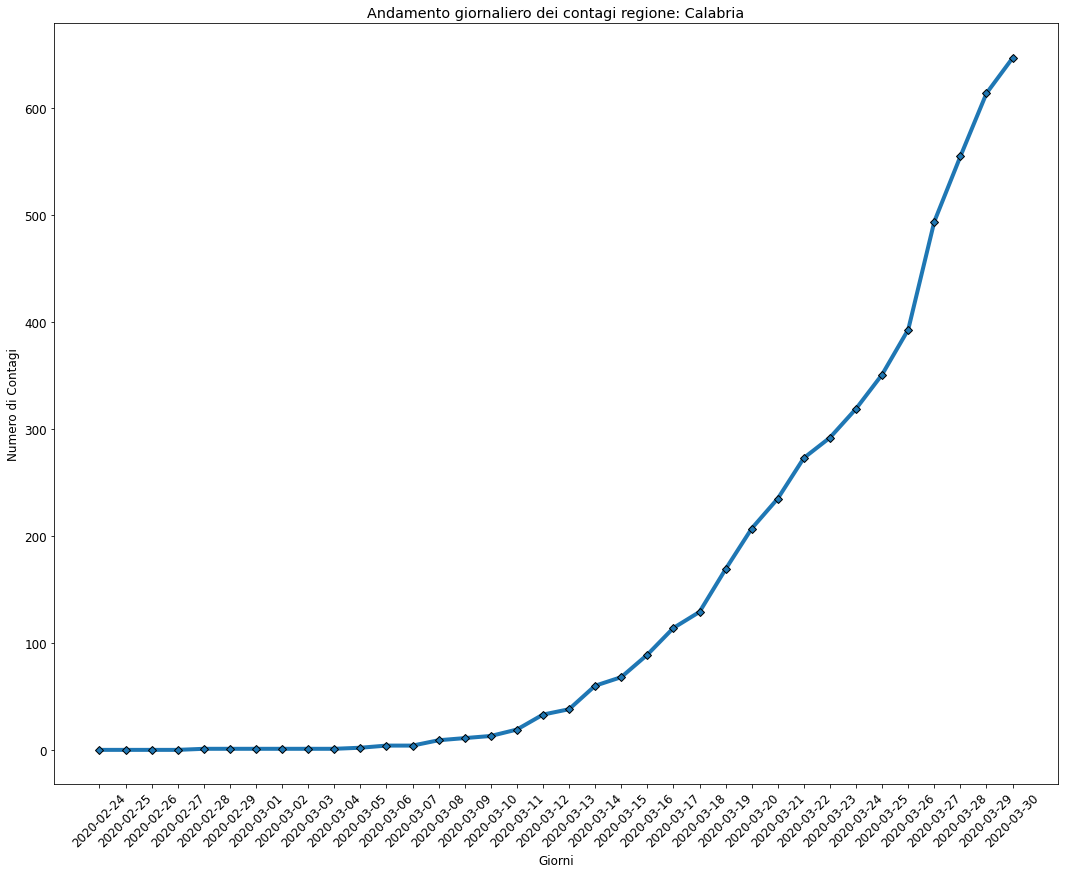

In [14]:
#@title *Andamento giornaliero contagi regione* 👀 Double click on this line to see code of plot { display-mode: "form" }

def plot_andamento_contagi_regione(regione):

  """
    Funzione che produce un plot di statistiche in una data regione

    Parameters:
    regione (string): regione da monitorare

  """
  
  dati_giornalieri_regioni = []
  pattern = 'dpc-covid19-ita-regioni-\d+' # Regex con cui vado ad eliminare i csv non necessari 
  
  for x in sorted(dati_regioni): # Ordino la lista così da avere anche ordine cronologico
    if re.match(pattern, x):
      dati_giornalieri_regioni.append(x)

  date_total_regione = {}

  for day in dati_giornalieri_regioni:
    df_day_regioni = pd.read_csv(dati_regioni_path+str(day))

    is_region =  df_day_regioni['denominazione_regione'] == regione
    df_region = df_day_regioni[is_region]

    data = df_region['data'].values[0]

    f = "%Y-%m-%dT%H:%M:%S"
    conv=time.strptime(str(data),f)
    data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data

    totale_contagi = df_region['totale_casi'].values[0]
    #print(data_convertita+" : "+str(totale_contagi))
    date_total_regione[data_convertita] = totale_contagi

  font = {'family' : 'normal',
          'size'   : 12}
      
  plt.rc('font', **font)

  x = list(date_total_regione.keys())
  y = list(date_total_regione.values())
  
  plt.figure(figsize=(18,14))
  plt.xticks(rotation=45)
  plt.xlabel('Giorni')
  plt.ylabel('Numero di Contagi')
  plt.title('Andamento giornaliero dei contagi regione: '+regione)
  plt.plot(x, y, marker='D', markeredgecolor='black', linewidth=4)
  plt.show()
  
plot_andamento_contagi_regione('Calabria')

{'Frosinone': 290, 'Latina': 254, 'Rieti': 105, 'Roma': 2068, 'Viterbo': 181}


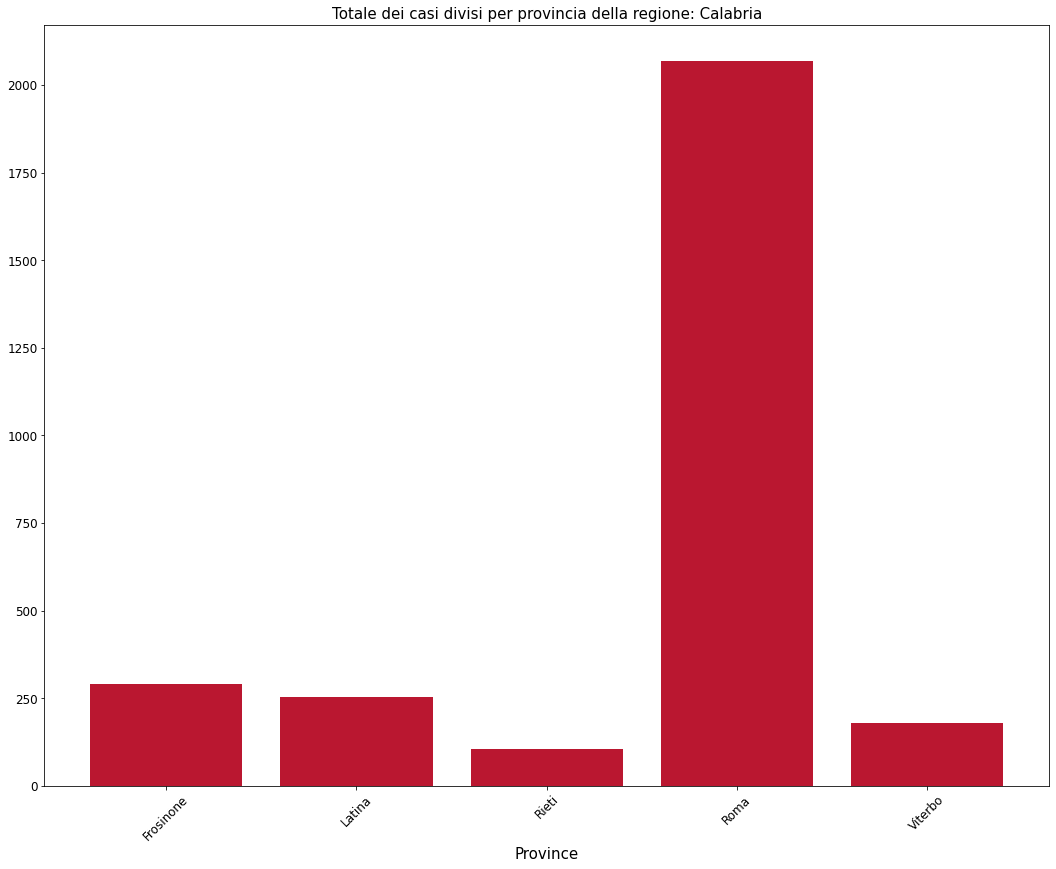

In [0]:
#@title *Distribuzione casi nella regione* 👀 Double click on this line to see code of plot { display-mode: "form" }

print(dati_regioni_province)

import numpy as np

province = list(dati_regioni_province.keys())
valori_province = list(dati_regioni_province.values())

plt.figure(figsize=(18,14))
plt.bar(province, valori_province, color=[(0.73, 0.09, 0.19)])
#plt.yticks(range(len(province)), valori_province, fontsize=7)
plt.xticks(fontsize=12, rotation=45)
plt.title("Totale dei casi divisi per provincia della regione: "+regione_da_monitorare, fontsize=15)
plt.xlabel("Province", fontsize=15)
plt.rcParams["figure.figsize"] = (8, 6)
plt.plot()
plt.show()

### Dati Provinciali

In [0]:
# Dataframe contenente tutti i dati delle provincie italiane aggiornati agli ultimi disponibili
dati_province_latest = pd.read_csv('/content/COVID-19/dati-province/dpc-covid19-ita-province-latest.csv')
dati_province_latest.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-03-30T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,273,NaN,NaN
1,2020-03-30T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,115,NaN,NaN
2,2020-03-30T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,594,NaN,NaN
3,2020-03-30T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,363,NaN,NaN
4,2020-03-30T17:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


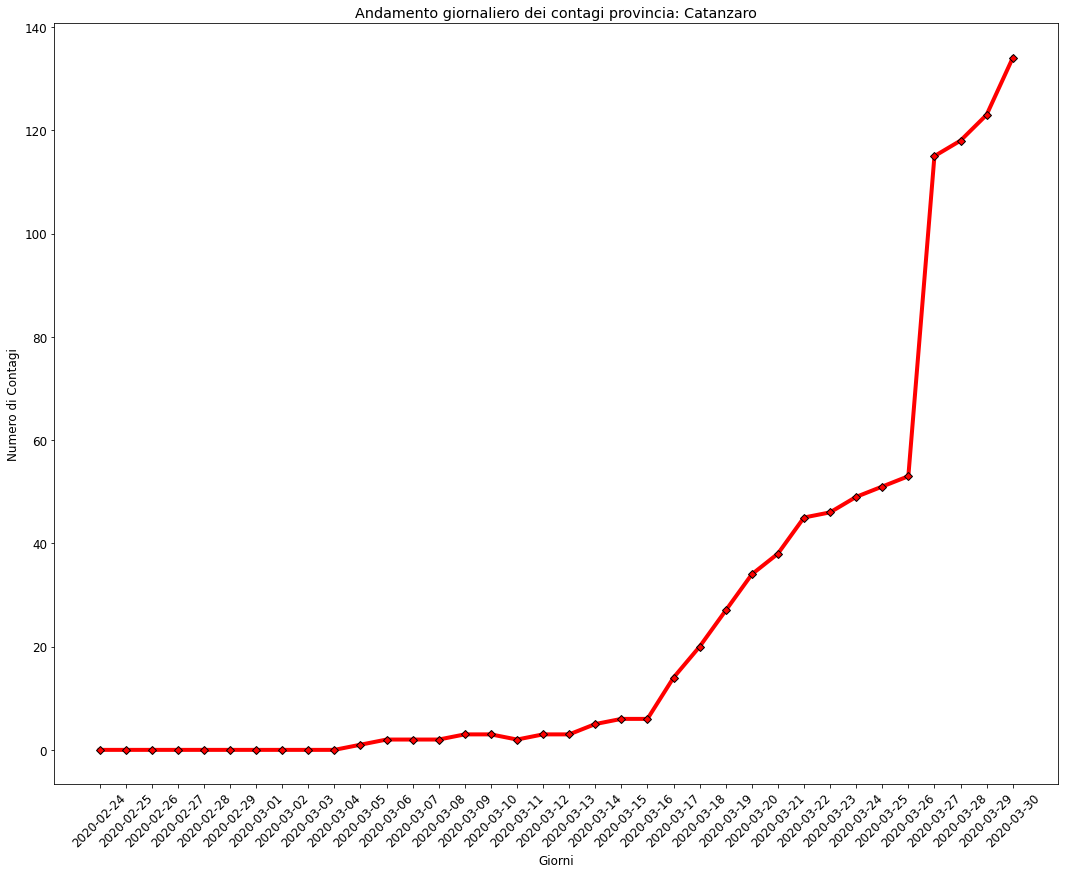

In [15]:
#@title *Andamento giornaliero contagi provincia* 👀 Double click on this line to see code of plot { display-mode: "form" }


def plot_andamento_contagi_province(provincia):

  """
    Funzione che produce un plot dell'andamento dei contagi in una data provincia

    Parameters:
    provincia (string): provincia da monitorare

  """

  date_total_province = {}

  for day in dati_giornalieri_province:
    df_day_province = pd.read_csv(dati_province_path+str(day))

    is_provincia =  df_day_province['denominazione_provincia'] == provincia
    df_province = df_day_province[is_provincia]

    data = df_province['data'].values[0]

    f = "%Y-%m-%dT%H:%M:%S"
    conv=time.strptime(str(data),f)
    data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data

    totale_contagi = df_province['totale_casi'].values[0]
    #print(data_convertita+" : "+str(totale_contagi))
    date_total_province[data_convertita] = totale_contagi

  font = {'family' : 'normal',
          'size'   : 12}
      
  plt.rc('font', **font)

  x = list(date_total_province.keys())
  y = list(date_total_province.values())
  
  plt.figure(figsize=(18,14))
  plt.xticks(rotation=45)
  plt.xlabel('Giorni')
  plt.ylabel('Numero di Contagi')
  plt.title('Andamento giornaliero dei contagi provincia: ' + provincia)
  plt.plot(x, y,color="red", marker='D', markeredgecolor='black', linewidth=4)
  plt.show()
  
plot_andamento_contagi_province('Catanzaro')

## Implementazione di un modello machine learning

Per provare a fare una predizione utilizzo i dati nazionali $\rightarrow$ dizionario chiave-valore con chiave: data, valore: contagi

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(1337)

In [0]:
!pip install tensorflow==1.14.0 # Questioni di compatibilità

In [16]:
data_totale_contagi = {}

for giornata in dati_giornalieri:
  df = pd.read_csv(dati_andamento_nazionale_path+giornata)
  # Ho il dataframe per ogni giorno: Inizio con un semplice plot data totale casi
  data = df['data'].values[0]

  f = "%Y-%m-%dT%H:%M:%S"
  conv=time.strptime(str(data),f)
  data_convertita = time.strftime("%Y-%m-%d",conv) # cambio formato alla data

  totale_contagi = df['totale_casi'].values[0]
  #print(data_convertita+" : "+str(totale_contagi))
  data_totale_contagi[data_convertita] = totale_contagi

model = Sequential()
model.add(Dense(units=50, input_dim=1, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 2,703
Trainable params: 2,703
Non-trainable params: 0
_________________________________________________________________


Streaming output truncated to the last 5000 lines.
36/36 [==============================] - 0s 316us/step - loss: 4.7709e-05
Epoch 2502/5000
36/36 [==============================] - 0s 188us/step - loss: 4.2983e-05
Epoch 2503/5000
36/36 [==============================] - 0s 139us/step - loss: 4.7892e-05
Epoch 2504/5000
36/36 [==============================] - 0s 132us/step - loss: 4.5700e-05
Epoch 2505/5000
36/36 [==============================] - 0s 123us/step - loss: 5.1206e-05
Epoch 2506/5000
36/36 [==============================] - 0s 131us/step - loss: 5.0140e-05
Epoch 2507/5000
36/36 [==============================] - 0s 128us/step - loss: 6.1779e-05
Epoch 2508/5000
36/36 [==============================] - 0s 130us/step - loss: 6.1932e-05
Epoch 2509/5000
36/36 [==============================] - 0s 117us/step - loss: 8.0861e-05
Epoch 2510/5000
36/36 [==============================] - 0s 135us/step - loss: 9.0205e-05
Epoch 2511/5000
36/36 [==============================] - 0s 118us

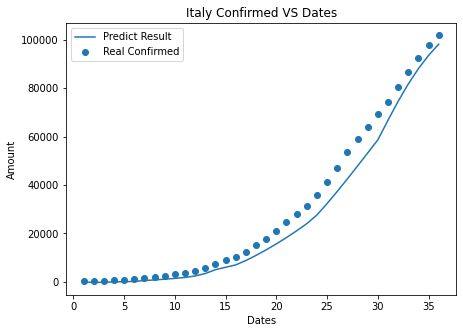

In [20]:
#corn_x = np.array(data_totale_contagi.keys())



dates = len(data_totale_contagi.values())
corn_x = list(range(1, dates + 1))

corn_x = np.array(corn_x)
corn_y = np.array(list(data_totale_contagi.values()))
italy_dates_length = len(corn_x)

# set italy absorb
italy_absorb = corn_y[italy_dates_length-1]

corn_y_norm = corn_y / italy_absorb

model.fit(corn_x, corn_y_norm, epochs=5000, shuffle=False)
corn_y_predict = model.predict(corn_x)
corn_y_predict = corn_y_predict * italy_absorb
fig1 = plt.figure(figsize=(7, 5))
plt.scatter(corn_x, corn_y, label='Real Confirmed')
plt.plot(corn_x, corn_y_predict, label='Predict Result')
plt.title('Italy Confirmed VS Dates')
plt.xlabel('Dates')
plt.ylabel('Amount')
plt.legend()
plt.show()